## Logistic regression model for charun data for the telecommunication company analysis their services

### Logistic Regression Classification with python 

In [8]:
# import the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

In [9]:
# import the data set
df=pd.read_csv("ChurnData.csv")

In [10]:
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


## Data preprocessing


In [11]:
churn_df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df

,tenure,age,address,income,ed,employ,equip,churn
0,11,33,7,136,5,5,0,1
1,33,33,12,33,2,0,0,1
2,23,30,9,30,1,2,0,0
3,38,35,5,76,2,10,1,0
4,7,35,14,80,2,15,0,0
...,...,...,...,...,...,...,...,...
195,55,44,24,83,1,23,0,0
196,34,23,3,24,1,7,0,0
197,6,32,10,47,1,10,0,0
198,24,30,0,25,4,5,0,1


In [12]:
X=np.asarray(churn_df[["tenure", "age", 'address', 'income', 'ed', 'employ','equip']])
X[0:6]
# Check the dimension of X array

array([[ 11,  33,   7, 136,   5,   5,   0],
       [ 33,  33,  12,  33,   2,   0,   0],
       [ 23,  30,   9,  30,   1,   2,   0],
       [ 38,  35,   5,  76,   2,  10,   1],
       [  7,  35,  14,  80,   2,  15,   0],
       [ 68,  52,  17, 120,   1,  24,   0]], dtype=int64)

In [13]:
y=np.asarray(churn_df['churn'])
y[0:6]

array([1, 1, 0, 0, 0, 0])

In [16]:
# Standarduze or normalize the dataset 
X_norm=StandardScaler().fit(X).transform(X)
np.round(X_norm,2) # check the function
X_norm[0:3]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695]])

## Splitting the data set

In [17]:
X_train, X_test, y_train, y_test =train_test_split(X_norm, y, test_size=0.3, random_state=17)

## Logistic Regression Classifer Modeling 


In [18]:
LR=LogisticRegression().fit(X_train, y_train)

In [21]:
#using the training data we can predict the output variable. let us pridict the churn parameter for the test data set
yhat= LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [22]:
# We can also predict the probability of the output variable

yhat_prob=LR.predict_proba(X_test) # the threshold for class prediction as 0.5
yhat_prob[:11] # why the output is an array

array([[0.61363809, 0.38636191],
       [0.59313506, 0.40686494],
       [0.6726062 , 0.3273938 ],
       [0.9458887 , 0.0541113 ],
       [0.70037233, 0.29962767],
       [0.62407648, 0.37592352],
       [0.80952018, 0.19047982],
       [0.72722617, 0.27277383],
       [0.96377184, 0.03622816],
       [0.2243148 , 0.7756852 ],
       [0.59653421, 0.40346579]])

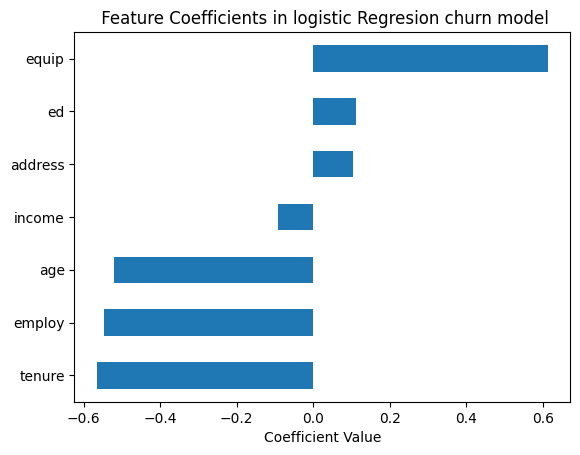

In [25]:
coefficients=pd.Series(LR.coef_[0], index= churn_df.columns[:-1])
coefficients.sort_values().plot(kind="barh")
plt.title(" Feature Coefficients in logistic Regresion churn model")
plt.xlabel( "Coefficient Value")
plt.show()

## Performance Evaluation

In [28]:
## Log-loss 
logistic_loss=log_loss(y_test, yhat_prob)
print(" Logistic Loss:", logistic_loss)

 Logistic Loss: 0.5120593492434014
